In [ ]:
import re

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/weather.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Display the top 10 **Data** in the dataset

In [ ]:
df.head()

,M_PACKET_FORMAT,M_GAME_MAJOR_VERSION,M_GAME_MINOR_VERSION,M_PACKET_VERSION,M_PACKET_ID,M_SESSION_UID,M_SESSION_TIME,M_FRAME_IDENTIFIER,M_PLAYER_CAR_INDEX,M_SECONDARY_PLAYER_CAR_INDEX,M_BRAKING_ASSIST,M_SESSION_LINK_IDENTIFIER,M_PIT_RELEASE_ASSIST,TIMESTAMP,M_ZONE_START,M_ZONE_FLAG,M_PIT_STOP_WINDOW_IDEAL_LAP,M_TRACK_TEMPERATURE,M_TRACK_LENGTH,M_GAME_PAUSED,M_FORECAST_ACCURACY,GAMEHOST,M_AIR_TEMPERATURE,M_NUM_WEATHER_FORECAST_SAMPLES,M_SLI_PRO_NATIVE_SUPPORT,M_SAFETY_CAR_STATUS,M_TRACK_ID,M_ERSASSIST,M_FORMULA,M_SEASON_LINK_IDENTIFIER,M_PIT_ASSIST,M_GEARBOX_ASSIST,M_SESSION_TYPE,M_SPECTATOR_CAR_INDEX,M_PIT_STOP_WINDOW_LATEST_LAP,M_WEEKEND_LINK_IDENTIFIER,M_DYNAMIC_RACING_LINE_TYPE,M_SESSION_TIME_LEFT,M_SESSION_DURATION,M_PIT_STOP_REJOIN_POSITION,M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE,M_TIME_OFFSET,M_WEATHER_FORECAST_SAMPLES_M_WEATHER,M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE,M_TRACK_TEMPERATURE_CHANGE,M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE,M_AIR_TEMPERATURE_CHANGE,M_RAIN_PERCENTAGE,M_WEATHER,M_AI_DIFFICULTY,M_PIT_SPEED_LIMIT,M_NETWORK_GAME,M_TOTAL_LAPS,M_STEERING_ASSIST,M_IS_SPECTATING,M_DYNAMIC_RACING_LINE,M_DRSASSIST,M_NUM_MARSHAL_ZONES,Unnamed: 58
0,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,0,0,0,1.642362e+09,0.088,0.0,0,33,4650,0,0,f1digest,25,0,0,0,28,0,0,0,0,1,13,255,0,0,0,0,600,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
1,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,0,0,0,1.642362e+09,0.167,0.0,0,33,4650,0,0,f1digest,25,0,0,0,28,0,0,0,0,1,13,255,0,0,0,0,600,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
2,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,0,0,0,1.642362e+09,0.238,0.0,0,33,4650,0,0,f1digest,25,0,0,0,28,0,0,0,0,1,13,255,0,0,0,0,600,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
3,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,0,0,0,1.642362e+09,0.298,0.0,0,33,4650,0,0,f1digest,25,0,0,0,28,0,0,0,0,1,13,255,0,0,0,0,600,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
4,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,0,0,0,1.642362e+09,0.353,0.0,0,33,4650,0,0,f1digest,25,0,0,0,28,0,0,0,0,1,13,255,0,0,0,0,600,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN


**EDA checklist:**

Understanding the dataset, and its shape Checking the data type of each columns Categorical & Numerical columns Checking for missing values Descriptive summary of the dataset Groupby for classification problems

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3572328 entries, 0 to 3572327
Data columns (total 59 columns):
 #   Column                                          Dtype  
---  ------                                          -----  
 0   M_PACKET_FORMAT                                 int64  
 1   M_GAME_MAJOR_VERSION                            int64  
 2   M_GAME_MINOR_VERSION                            int64  
 3   M_PACKET_VERSION                                int64  
 4   M_PACKET_ID                                     int64  
 5   M_SESSION_UID                                   float64
 6   M_SESSION_TIME                                  float64
 7   M_FRAME_IDENTIFIER                              int64  
 8   M_PLAYER_CAR_INDEX                              int64  
 9   M_SECONDARY_PLAYER_CAR_INDEX                    int64  
 10  M_BRAKING_ASSIST                                int64  
 11  M_SESSION_LINK_IDENTIFIER                       int64  
 12  M_PIT_RELEASE_ASSIST        

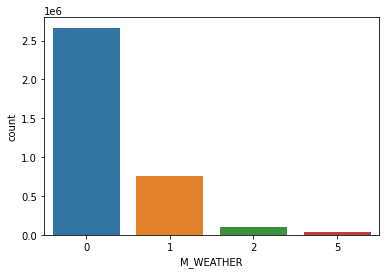

In [ ]:
#Print target column M_WEATHER count
import seaborn as sns
sns.countplot(x = 'M_WEATHER', data = df, order = df['M_WEATHER'].value_counts().index)

In [ ]:
import matplotlib.pyplot as plt # visualization library
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [ ]:
df.dataframeName = 'weather.csv'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """


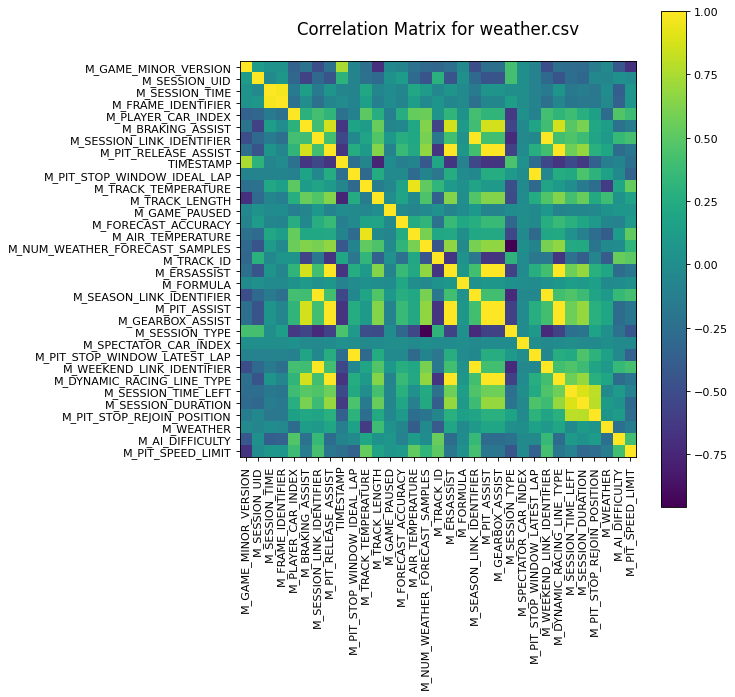

In [ ]:
plotCorrelationMatrix(df, 8)

In [ ]:
import seaborn as sns
%matplotlib inline
def resizecorr():
    plt.figure(figsize=(15,7))
def resizeplot():
    plt.figure(figsize=(12,6))

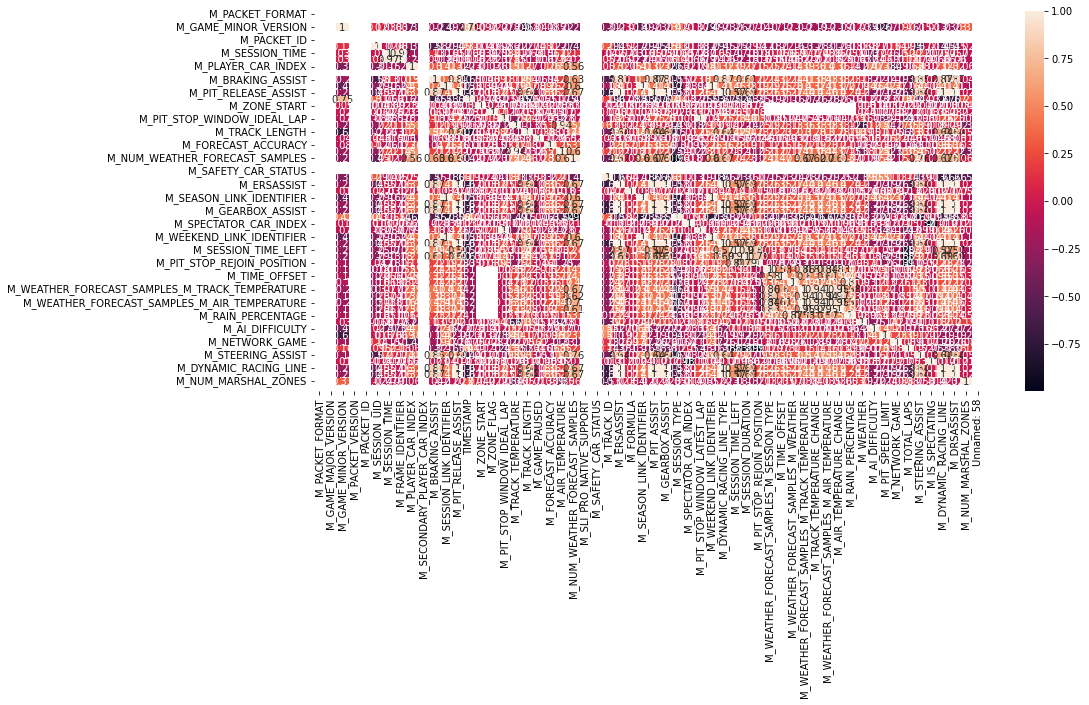

In [ ]:
resizecorr()
sns.heatmap(df.corr(),annot=True)

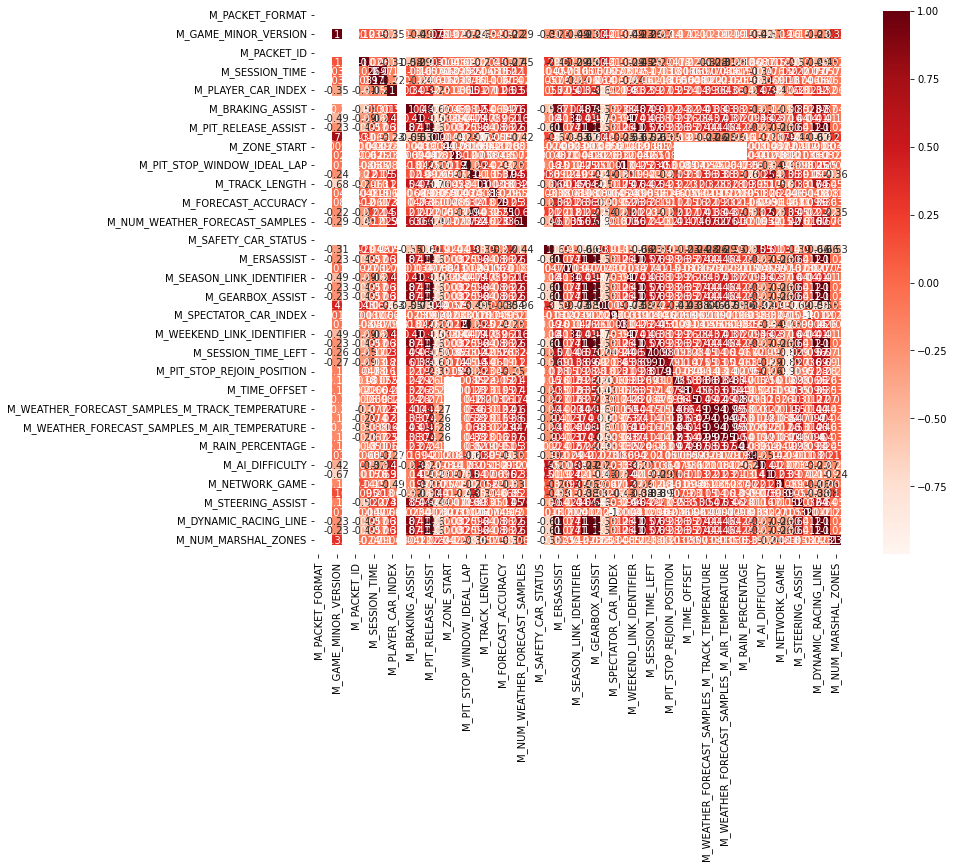

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(cor["M_WEATHER"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

M_TRACK_TEMPERATURE    0.614053
M_WEATHER              1.000000
Name: M_WEATHER, dtype: float64

In [ ]:
#convert Timestamp column from ms to date and time
pd.to_datetime(df['TIMESTAMP'], unit='ms')

0         1970-01-20 00:12:41.520
1         1970-01-20 00:12:41.520
2         1970-01-20 00:12:41.520
3         1970-01-20 00:12:41.520
4         1970-01-20 00:12:41.520
                    ...          
3572323   1970-01-20 00:11:28.491
3572324   1970-01-20 00:11:28.491
3572325   1970-01-20 00:11:28.491
3572326   1970-01-20 00:11:28.491
3572327   1970-01-20 00:11:28.491
Name: TIMESTAMP, Length: 3572328, dtype: datetime64[ns]

In [ ]:
#find columns with NaN values
df.isnull().sum()

M_PACKET_FORMAT                                         0
M_GAME_MAJOR_VERSION                                    0
M_GAME_MINOR_VERSION                                    0
M_PACKET_VERSION                                        0
M_PACKET_ID                                             0
M_SESSION_UID                                           0
M_SESSION_TIME                                          0
M_FRAME_IDENTIFIER                                      0
M_PLAYER_CAR_INDEX                                      0
M_SECONDARY_PLAYER_CAR_INDEX                            0
M_BRAKING_ASSIST                                        0
M_SESSION_LINK_IDENTIFIER                               0
M_PIT_RELEASE_ASSIST                                    0
TIMESTAMP                                               0
M_ZONE_START                                      2598054
M_ZONE_FLAG                                       2598054
M_PIT_STOP_WINDOW_IDEAL_LAP                             0
M_TRACK_TEMPER

In [ ]:
#drop columns with maximum NAN values
df=df.drop('GAMEHOST', axis=1) 
df=df.drop('Unnamed: 58', axis=1) 
df=df.drop('M_ZONE_START',axis=1)
df=df.drop('M_ZONE_FLAG',axis=1)

In [ ]:
df.isnull().sum()

M_PACKET_FORMAT                                        0
M_GAME_MAJOR_VERSION                                   0
M_GAME_MINOR_VERSION                                   0
M_PACKET_VERSION                                       0
M_PACKET_ID                                            0
M_SESSION_UID                                          0
M_SESSION_TIME                                         0
M_FRAME_IDENTIFIER                                     0
M_PLAYER_CAR_INDEX                                     0
M_SECONDARY_PLAYER_CAR_INDEX                           0
M_BRAKING_ASSIST                                       0
M_SESSION_LINK_IDENTIFIER                              0
M_PIT_RELEASE_ASSIST                                   0
TIMESTAMP                                              0
M_PIT_STOP_WINDOW_IDEAL_LAP                            0
M_TRACK_TEMPERATURE                                    0
M_TRACK_LENGTH                                         0
M_GAME_PAUSED                  

In [ ]:
#columns with NaN values
lists=[]
lists.append(df.columns[df.isna().any()].tolist())
print(lists)

[['M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE', 'M_TIME_OFFSET', 'M_WEATHER_FORECAST_SAMPLES_M_WEATHER', 'M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE', 'M_TRACK_TEMPERATURE_CHANGE', 'M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE', 'M_AIR_TEMPERATURE_CHANGE', 'M_RAIN_PERCENTAGE', 'M_NETWORK_GAME', 'M_TOTAL_LAPS', 'M_STEERING_ASSIST', 'M_IS_SPECTATING', 'M_DYNAMIC_RACING_LINE', 'M_DRSASSIST', 'M_NUM_MARSHAL_ZONES']]


In [ ]:
df.groupby('M_WEATHER').mean()

,M_PACKET_FORMAT,M_GAME_MAJOR_VERSION,M_GAME_MINOR_VERSION,M_PACKET_VERSION,M_PACKET_ID,M_SESSION_UID,M_SESSION_TIME,M_FRAME_IDENTIFIER,M_PLAYER_CAR_INDEX,M_SECONDARY_PLAYER_CAR_INDEX,M_BRAKING_ASSIST,M_SESSION_LINK_IDENTIFIER,M_PIT_RELEASE_ASSIST,TIMESTAMP,M_PIT_STOP_WINDOW_IDEAL_LAP,M_TRACK_TEMPERATURE,M_TRACK_LENGTH,M_GAME_PAUSED,M_FORECAST_ACCURACY,M_AIR_TEMPERATURE,M_NUM_WEATHER_FORECAST_SAMPLES,M_SLI_PRO_NATIVE_SUPPORT,M_SAFETY_CAR_STATUS,M_TRACK_ID,M_ERSASSIST,M_FORMULA,M_SEASON_LINK_IDENTIFIER,M_PIT_ASSIST,M_GEARBOX_ASSIST,M_SESSION_TYPE,M_SPECTATOR_CAR_INDEX,M_PIT_STOP_WINDOW_LATEST_LAP,M_WEEKEND_LINK_IDENTIFIER,M_DYNAMIC_RACING_LINE_TYPE,M_SESSION_TIME_LEFT,M_SESSION_DURATION,M_PIT_STOP_REJOIN_POSITION,M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE,M_TIME_OFFSET,M_WEATHER_FORECAST_SAMPLES_M_WEATHER,M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE,M_TRACK_TEMPERATURE_CHANGE,M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE,M_AIR_TEMPERATURE_CHANGE,M_RAIN_PERCENTAGE,M_AI_DIFFICULTY,M_PIT_SPEED_LIMIT,M_NETWORK_GAME,M_TOTAL_LAPS,M_STEERING_ASSIST,M_IS_SPECTATING,M_DYNAMIC_RACING_LINE,M_DRSASSIST,M_NUM_MARSHAL_ZONES
M_WEATHER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2021.0,1.0,14.136116,1.0,1.0,8.575761e+18,1004.777594,29815.553464,10.680035,255.0,0.514582,1.709905e+09,0.231830,1.642430e+09,0.441177,32.704967,4702.455707,0.009595,0.066584,24.857035,13.124510,0.0,0.0,19.305924,0.231830,0.010924,1.709905e+09,0.231830,1.463661,8.465424,254.496776,0.508368,1.709905e+09,0.231830,1492.802024,2086.380103,1.743237,1.541095,5.349685,0.067562,7.307070,0.392897,5.794363,0.401417,0.829461,51.510545,76.759806,0.157266,178.689939,0.149525,0.001994,0.463661,0.231831,16.724622
1,2021.0,1.0,14.000000,1.0,1.0,6.746775e+18,1149.115977,26174.617828,5.667440,255.0,1.382273,2.436937e+09,0.618937,1.641955e+09,7.174549,30.066956,5453.634365,0.019865,0.030251,22.187557,17.917919,0.0,0.0,6.146819,0.618937,0.000000,2.436937e+09,0.618937,2.237874,7.219522,255.000000,8.331552,2.436937e+09,0.618937,1894.145004,3996.228698,3.713018,2.215010,8.598276,0.184921,9.495569,0.521802,7.388620,0.529686,2.166991,31.000000,72.324292,0.381063,141.797116,0.204901,0.000000,1.237874,0.618937,17.221539
2,2021.0,1.0,14.000000,1.0,1.0,1.142270e+19,496.539285,15495.090288,1.236722,255.0,0.286798,3.459645e+09,0.130501,1.642058e+09,0.675266,25.405918,5296.002276,0.079666,0.034901,17.429439,9.532625,0.0,0.0,5.339909,0.130501,0.000000,3.459645e+09,0.130501,1.261002,8.219272,255.000000,0.881639,3.459645e+09,0.130501,1424.867223,1914.446131,2.483308,1.580886,3.155755,0.251070,4.769049,0.271989,3.262262,0.259471,2.300293,31.955994,80.000000,0.965099,175.926404,0.095599,0.000000,0.261002,0.130501,18.018968
5,2021.0,1.0,14.460432,1.0,1.0,6.382261e+18,899.081023,25127.857914,0.000000,255.0,0.438849,0.000000e+00,0.539568,1.643127e+09,0.000000,26.237410,5595.395683,0.000000,0.000000,24.776978,0.000000,0.0,0.0,2.079137,0.539568,0.000000,0.000000e+00,0.539568,2.079137,13.000000,255.000000,0.000000,0.000000e+00,0.539568,0.000000,600.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.791367,0.000000,200.000000,0.000000,0.000000,1.079137,0.539568,17.000000


In [ ]:
df.fillna(df.median(), inplace=True)

In [ ]:
#Select best features for classification
# Assigning X and Y 
X=df.iloc[:,df.columns!='M_WEATHER']
y=df.iloc[:,df.columns=='M_WEATHER']

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score')) 

                        Specs         Score
5               M_SESSION_UID  3.858013e+23
11  M_SESSION_LINK_IDENTIFIER  3.788487e+14
32  M_WEEKEND_LINK_IDENTIFIER  3.788487e+14
26   M_SEASON_LINK_IDENTIFIER  3.788487e+14
35         M_SESSION_DURATION  9.514273e+08
7          M_FRAME_IDENTIFIER  9.229148e+08
34        M_SESSION_TIME_LEFT  1.304397e+08
13                  TIMESTAMP  1.027454e+08
16             M_TRACK_LENGTH  7.654119e+07
6              M_SESSION_TIME  4.096546e+07


**Feature Selection using Random Forest **

In [ ]:
# Let's load the packages
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [ ]:

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier()

**Feature Selected based on importance score**

In [ ]:
fi = pd.DataFrame({'feature': X_train.columns, 'importance': rf.feature_importances_}).sort_values(by='importance', ascending=False)
fi = fi.reset_index()
fi

,index,feature,importance
0,15,M_TRACK_TEMPERATURE,0.127811
1,19,M_AIR_TEMPERATURE,0.118159
2,13,TIMESTAMP,0.091776
3,23,M_TRACK_ID,0.079098
4,32,M_WEEKEND_LINK_IDENTIFIER,0.056554
5,11,M_SESSION_LINK_IDENTIFIER,0.053597
6,26,M_SEASON_LINK_IDENTIFIER,0.053587
7,16,M_TRACK_LENGTH,0.053421
8,34,M_SESSION_TIME_LEFT,0.050635
9,6,M_SESSION_TIME,0.048446


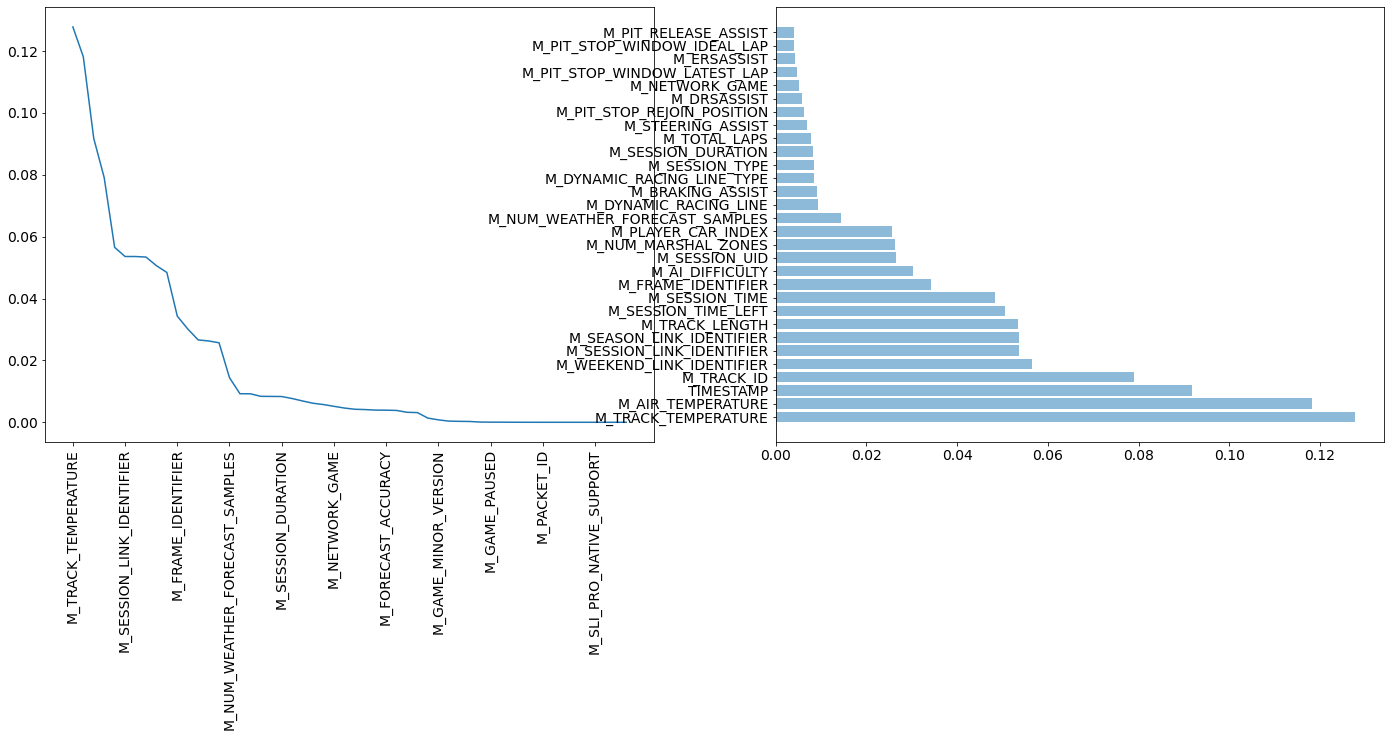

In [ ]:
def plot_feature_importance(fi):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(24,8))
    ax1.plot(np.arange(0, len(fi.index)), fi['importance'])
    label_nrs = np.arange(0, len(fi.index), 5 )
    ax1.set_xticks(label_nrs)
    ax1.set_xticklabels(fi['feature'][label_nrs], rotation=90)
    
    num_bar = min(len(fi.index), 30)
    ax2.barh(np.arange(0, num_bar), fi['importance'][:num_bar], align='center', alpha=0.5)
    ax2.set_yticks(np.arange(0, num_bar))
    ax2.set_yticklabels(fi['feature'][:num_bar])

plot_feature_importance(fi)

Selecting features based on feature imaporatnace>0.005
From 58 features it got reduced to 26 features **bold text**

In [ ]:
to_keep = fi.loc[fi['importance']>0.005, 'feature']
len(to_keep)

26

In [ ]:
X_keep = X.copy()[to_keep]
X_keep.sample(5)

,M_TRACK_TEMPERATURE,M_AIR_TEMPERATURE,TIMESTAMP,M_TRACK_ID,M_WEEKEND_LINK_IDENTIFIER,M_SESSION_LINK_IDENTIFIER,M_SEASON_LINK_IDENTIFIER,M_TRACK_LENGTH,M_SESSION_TIME_LEFT,M_SESSION_TIME,M_FRAME_IDENTIFIER,M_AI_DIFFICULTY,M_SESSION_UID,M_NUM_MARSHAL_ZONES,M_PLAYER_CAR_INDEX,M_NUM_WEATHER_FORECAST_SAMPLES,M_DYNAMIC_RACING_LINE,M_BRAKING_ASSIST,M_DYNAMIC_RACING_LINE_TYPE,M_SESSION_TYPE,M_SESSION_DURATION,M_TOTAL_LAPS,M_STEERING_ASSIST,M_PIT_STOP_REJOIN_POSITION,M_DRSASSIST,M_NETWORK_GAME
1240293,28,20,1.641594e+09,1,1484504721,1484504761,1484504721,5815,2686,628.889,16866,31,7.388522e+18,17.0,2,9,2.0,2,1,10,7200,53.0,0.0,9,1.0,0.0
2901875,33,25,1.642359e+09,28,0,0,0,4650,0,1227.860,37036,0,1.300210e+19,16.0,0,0,0.0,0,0,13,600,200.0,0.0,0,0.0,0.0
3571705,33,25,1.642288e+09,28,2756721461,2756721461,2756721461,4650,404,675.029,22547,110,1.086282e+19,16.0,1,10,0.0,0,0,8,1080,200.0,0.0,0,0.0,1.0
472828,25,17,1.642133e+09,2,3447124844,3447124844,3447124844,5441,940,139.374,3363,31,1.092928e+19,19.0,0,10,0.0,0,0,8,1080,200.0,0.0,0,0.0,1.0
833316,32,24,1.642822e+09,27,861334657,861334657,861334657,4910,385,261.257,8288,90,9.447746e+17,18.0,19,10,0.0,0,0,8,1080,200.0,0.0,0,0.0,0.0


In [ ]:
X_keep.head()

,M_TRACK_TEMPERATURE,M_AIR_TEMPERATURE,TIMESTAMP,M_TRACK_ID,M_WEEKEND_LINK_IDENTIFIER,M_SESSION_LINK_IDENTIFIER,M_SEASON_LINK_IDENTIFIER,M_TRACK_LENGTH,M_SESSION_TIME_LEFT,M_SESSION_TIME,M_FRAME_IDENTIFIER,M_AI_DIFFICULTY,M_SESSION_UID,M_NUM_MARSHAL_ZONES,M_PLAYER_CAR_INDEX,M_NUM_WEATHER_FORECAST_SAMPLES,M_DYNAMIC_RACING_LINE,M_BRAKING_ASSIST,M_DYNAMIC_RACING_LINE_TYPE,M_SESSION_TYPE,M_SESSION_DURATION,M_TOTAL_LAPS,M_STEERING_ASSIST,M_PIT_STOP_REJOIN_POSITION,M_DRSASSIST,M_NETWORK_GAME
0,33,25,1.642362e+09,28,0,0,0,4650,0,2803.836,82458,0,1.300210e+19,16.0,0,0,0.0,0,0,13,600,200.0,0.0,0,0.0,0.0
1,33,25,1.642362e+09,28,0,0,0,4650,0,2803.836,82458,0,1.300210e+19,16.0,0,0,0.0,0,0,13,600,200.0,0.0,0,0.0,0.0
2,33,25,1.642362e+09,28,0,0,0,4650,0,2803.836,82458,0,1.300210e+19,16.0,0,0,0.0,0,0,13,600,200.0,0.0,0,0.0,0.0
3,33,25,1.642362e+09,28,0,0,0,4650,0,2803.836,82458,0,1.300210e+19,16.0,0,0,0.0,0,0,13,600,200.0,0.0,0,0.0,0.0
4,33,25,1.642362e+09,28,0,0,0,4650,0,2803.836,82458,0,1.300210e+19,16.0,0,0,0.0,0,0,13,600,200.0,0.0,0,0.0,0.0


In [ ]:
pd.to_datetime(X_keep['TIMESTAMP'], unit='ms')

0         1970-01-20 00:12:41.520
1         1970-01-20 00:12:41.520
2         1970-01-20 00:12:41.520
3         1970-01-20 00:12:41.520
4         1970-01-20 00:12:41.520
                    ...          
3572323   1970-01-20 00:11:28.491
3572324   1970-01-20 00:11:28.491
3572325   1970-01-20 00:11:28.491
3572326   1970-01-20 00:11:28.491
3572327   1970-01-20 00:11:28.491
Name: TIMESTAMP, Length: 3572328, dtype: datetime64[ns]

In [ ]:
# checking missing data in dataset

number = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.isnull().count() * 100).sort_values(ascending = False)

missing_application_train = pd.concat([number , percent] , axis = 1 , keys = ['Total' , 'Percent'])
print(missing_application_train.shape)
print(missing_application_train.head(10))

(55, 2)
                                           Total  Percent
M_PACKET_FORMAT                                0      0.0
M_TRACK_TEMPERATURE_CHANGE                     0      0.0
M_SPECTATOR_CAR_INDEX                          0      0.0
M_PIT_STOP_WINDOW_LATEST_LAP                   0      0.0
M_WEEKEND_LINK_IDENTIFIER                      0      0.0
M_DYNAMIC_RACING_LINE_TYPE                     0      0.0
M_SESSION_TIME_LEFT                            0      0.0
M_SESSION_DURATION                             0      0.0
M_PIT_STOP_REJOIN_POSITION                     0      0.0
M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE      0      0.0


#model score based on important features and classification using Decision tree

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_keep, y, test_size=0.2)
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)
from sklearn.metrics import accuracy_score

# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.9432
Test set score: 0.9433


#model score with all features

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)
from sklearn.metrics import accuracy_score

# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.9432
Test set score: 0.9432


[Text(0.4230769230769231, 0.875, 'X[15] <= 29.5\ngini = 0.397\nsamples = 2857862\nvalue = [2131874, 610690, 81027, 34271]'),
 Text(0.15384615384615385, 0.625, 'X[19] <= 17.5\ngini = 0.442\nsamples = 524999\nvalue = [31241, 381708, 77779, 34271]'),
 Text(0.07692307692307693, 0.375, 'gini = 0.0\nsamples = 69704\nvalue = [0, 0, 69704, 0]'),
 Text(0.23076923076923078, 0.375, 'X[20] <= 8.0\ngini = 0.286\nsamples = 455295\nvalue = [31241, 381708, 8075, 34271]'),
 Text(0.15384615384615385, 0.125, 'gini = 0.691\nsamples = 89375\nvalue = [31241, 15788, 8075, 34271]'),
 Text(0.3076923076923077, 0.125, 'gini = 0.0\nsamples = 365920\nvalue = [0, 365920, 0, 0]'),
 Text(0.6923076923076923, 0.625, 'X[6] <= 3013.521\ngini = 0.18\nsamples = 2332863\nvalue = [2100633, 228982, 3248, 0]'),
 Text(0.5384615384615384, 0.375, 'X[47] <= 0.5\ngini = 0.098\nsamples = 2086044\nvalue = [1978936, 103860, 3248, 0]'),
 Text(0.46153846153846156, 0.125, 'gini = 0.014\nsamples = 1683256\nvalue = [1671759, 8667, 2830, 0]

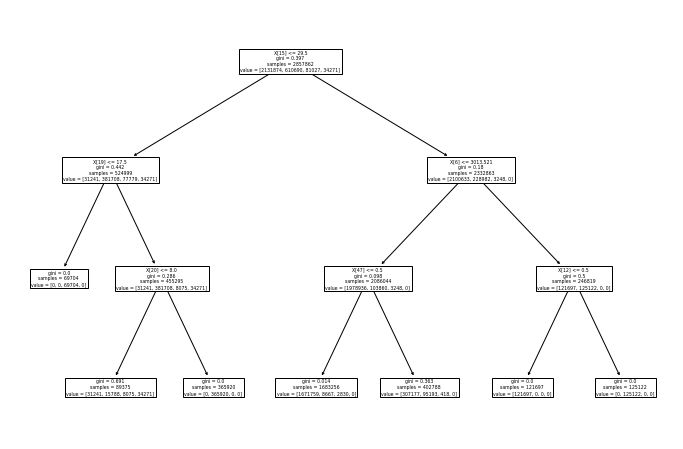

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    532547
           1       1.00      0.80      0.89    152919
           2       1.00      0.86      0.92     20459
           5       0.38      1.00      0.55      8541

    accuracy                           0.94    714466
   macro avg       0.83      0.91      0.83    714466
weighted avg       0.96      0.94      0.95    714466



In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_gini)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[524826      0      0   7721]
 [ 26039 122956      0   3924]
 [   833      0  17537   2089]
 [     0      0      0   8541]]


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
print("F1-Score:", f1_score(y_test, y_pred_gini, average='micro'))

F1-Score: 0.9431659449155033
